In [70]:
import numpy as np
import pandas as pd
import xarray as xr
import glob as glob
import matplotlib.pyplot as plt

In [50]:
# Read the reanalysis data
df = xr.open_dataset("O:/Man/Public/sharing-4270-CERM/MATNEW/Era5-Land/Hourly_Data/Precipitation/era5_land_1950_2024_tp_daily_update_DK.nc")

In [51]:
df

<xarray.Dataset> Size: 325MB
Dimensions:  (time: 27392, lon: 78, lat: 38)
Coordinates:
  * time     (time) datetime64[ns] 219kB 1950-01-02 1950-01-03 ... 2024-12-31
  * lon      (lon) float64 624B 6.5 6.6 6.7 6.8 6.9 ... 13.8 13.9 14.0 14.1 14.2
  * lat      (lat) float64 304B 58.0 57.9 57.8 57.7 57.6 ... 54.6 54.5 54.4 54.3
Data variables:
    tp       (time, lat, lon) float32 325MB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu Mar 27 16:38:57 2025: cdo sellonlatbox,6.42,14.3,54.3,5...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [52]:
df = df.assign(
    year=df['time'].dt.year,
    month=df['time'].dt.month
)

In [53]:
df = df.sel(
    time=(
        (df["year"] >= 1950) &  # Select years >= 1950
        (df["year"] <= 2024)   # Select years <= 2024
        #(df['month'] >= 5) & # May to
        #(df['month'] <= 9) # September 
    ),
    drop=True
)

In [54]:
# Define the bounding box coordinates
lon_min, lat_min = 8.2, 55.4 
lon_max, lat_max = 9.9, 55.9  

# Select the data within the bounding box
df = df.sel(
    lon=slice(lon_min, lon_max),  
    lat=slice(lat_max, lat_min),  
)

In [55]:
df

<xarray.Dataset> Size: 12MB
Dimensions:  (time: 27392, lon: 18, lat: 6)
Coordinates:
  * time     (time) datetime64[ns] 219kB 1950-01-02 1950-01-03 ... 2024-12-31
  * lon      (lon) float64 144B 8.2 8.3 8.4 8.5 8.6 8.7 ... 9.5 9.6 9.7 9.8 9.9
  * lat      (lat) float64 48B 55.9 55.8 55.7 55.6 55.5 55.4
Data variables:
    tp       (time, lat, lon) float32 12MB ...
    year     (time) int64 219kB 1950 1950 1950 1950 1950 ... 2024 2024 2024 2024
    month    (time) int64 219kB 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Thu Mar 27 16:38:57 2025: cdo sellonlatbox,6.42,14.3,54.3,5...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [56]:
df_max_per_year = df.groupby('year').max(dim='time')
df_max_spatial = df_max_per_year.max(dim=['lat', 'lon'])

C:\Users\mnew\AppData\Roaming\Python\Python310\site-packages\xarray\core\concat.py:540: UserWarning: No index created for dimension year because variable year is not a coordinate. To create an index for year, please first call `.set_coords('year')` on this object.
  ds.expand_dims(dim_name, create_index_for_new_dim=create_index_for_new_dim)


In [65]:
year_values = df_max_spatial['year'].values  
max_values = df_max_spatial.tp.values*1000

In [66]:
max_values

array([43.18753 , 33.38632 , 24.762123, 40.858982, 33.080357, 19.320562,
       24.867651, 28.409134, 41.555225, 45.03855 , 45.113903, 30.959898,
       27.82473 , 30.941397, 27.483225, 41.427505, 29.041897, 38.650394,
       29.606962, 38.84979 , 46.079582, 29.43433 , 30.954653, 34.48227 ,
       23.581976, 34.622353, 31.745106, 22.784641, 26.235271, 28.6869  ,
       33.29737 , 51.399143, 24.360687, 35.557716, 29.480173, 28.560251,
       18.50361 , 25.908768, 31.790398, 26.048319, 45.44051 , 33.198418,
       29.532957, 30.65309 , 38.983437, 29.32142 , 27.215202, 34.099472,
       32.801044, 31.253222, 34.040016, 26.579185, 39.687244, 32.508392,
       34.370205, 27.369034, 30.651545, 45.983727, 29.832497, 40.918915,
       57.527584, 32.284252, 31.08359 , 34.23786 , 28.231007, 69.45894 ,
       33.84913 , 36.962658, 48.05921 , 34.902203, 38.992935, 28.34905 ,
       24.658554, 33.170143, 30.159603], dtype=float32)

In [67]:
# Create a pandas DataFrame
max_pr_per_year = pd.DataFrame({
    'year': year_values,
    'pr': max_values
})

In [93]:
max_pr_per_year.to_csv('O:\\Man\\Public\\sharing-4270-CERM\\MATNEW\\CC_det_attr\\Time Series CSV\\annual_max_era5land.csv', index=False, sep = ';')

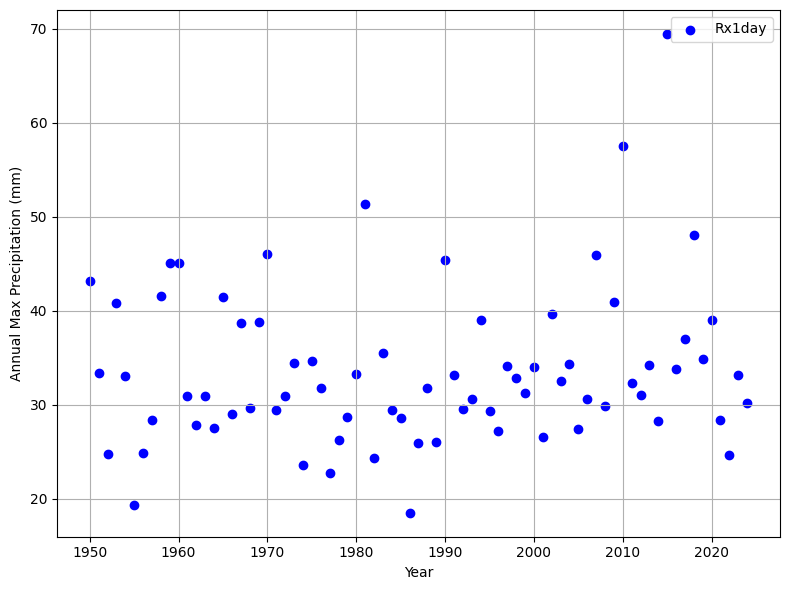

In [68]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(max_pr_per_year.year, max_pr_per_year.pr, color='blue', marker = 'o', label='Rx1day')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Annual Max Precipitation (mm)')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
#Import GMST anomalies (relative to 1850-1900)
#Pathway to GMST 
GMST_file_path = glob.glob(f"O:\\Man\\Public\\sharing-4270-CERM\\MATNEW\\Berkeley_GMST\\*anomalies.nc")
    
#Open GMST file
GMST_ds = xr.open_dataset(GMST_file_path[0])
    
#Create year variable 
GMST_ds['year'] = GMST_ds['time']
    
#Calculate rolling mean
GMST_ds['tas'] = GMST_ds.temperature.rolling(time=4).mean()
    
# Select data from 1989 to 2019
GMST_ds = GMST_ds.sel(
time=(
(GMST_ds["year"] >= 1950) &  # Select years >= 1874
(GMST_ds["year"] <= 2024)  # Select years <= 2024
), drop = True)
    
#Save to dataframe
GMST_df = GMST_ds.tas.to_dataframe().reset_index()

In [77]:
GMST_df

,time,lat,lon,tas
0,1950.0,0.0,0.0,0.193503
1,1951.0,0.0,0.0,0.195024
2,1952.0,0.0,0.0,0.239787
3,1953.0,0.0,0.0,0.302767
4,1954.0,0.0,0.0,0.334084
...,...,...,...,...
70,2020.0,0.0,0.0,1.217459
71,2021.0,0.0,0.0,1.202574
72,2022.0,0.0,0.0,1.214449
73,2023.0,0.0,0.0,1.264680


In [78]:
GMST = GMST_df.tas.to_numpy()

In [79]:
GMST

array([0.19350317, 0.1950241 , 0.23978718, 0.30276686, 0.3340837 ,
       0.30715102, 0.23901023, 0.21035361, 0.23224303, 0.26497656,
       0.30329707, 0.30315304, 0.28840107, 0.2886678 , 0.23805192,
       0.19867548, 0.18834408, 0.1743188 , 0.2071443 , 0.24757099,
       0.26026702, 0.23557639, 0.25810435, 0.27824497, 0.2569611 ,
       0.2816983 , 0.2554476 , 0.27619427, 0.31960166, 0.36456755,
       0.4639104 , 0.49430147, 0.5023587 , 0.537091  , 0.49849498,
       0.446481  , 0.46067622, 0.4670062 , 0.5269483 , 0.55850744,
       0.62255627, 0.648364  , 0.6116718 , 0.6181066 , 0.5919439 ,
       0.60565525, 0.6429492 , 0.7009804 , 0.784251  , 0.7686202 ,
       0.7802233 , 0.79088724, 0.78612363, 0.83867866, 0.8691585 ,
       0.9063114 , 0.908057  , 0.91654056, 0.91739476, 0.9111598 ,
       0.93488973, 0.9266971 , 0.9544321 , 0.95457053, 0.9560802 ,
       1.0213431 , 1.1121567 , 1.1724524 , 1.1966426 , 1.2189395 ,
       1.217459  , 1.2025744 , 1.2144488 , 1.2646799 , 1.32827

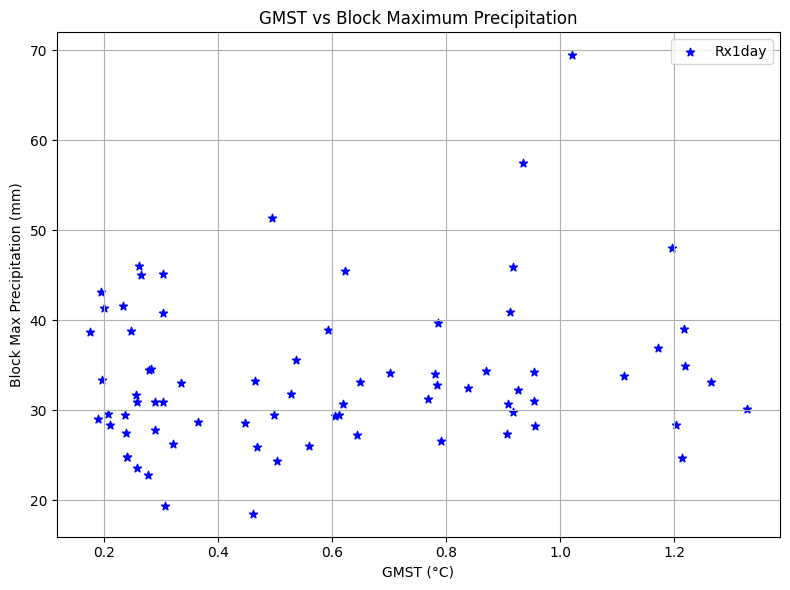

In [80]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(GMST, max_values, color='blue', marker = '*', label='Rx1day')

# Adding labels and title
plt.xlabel('GMST (°C)')
plt.ylabel('Block Max Precipitation (mm)')
plt.title('GMST vs Block Maximum Precipitation')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()